# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования:

* 1) Изучить параметры объектов недвижимости
* 2) Изучить скорость продажи квартир по длительности опубликования объявлений на сайте
* 3) Изучить влияние факторов (площадь, этаж, количество комнат и т.д.) на цену объектов недвижимости
* 4) Рассмотреть распределение объектов недвижимости, входящих в топ 10 по количеству объявлений, от цены за кв. м
* 5) Изучить как меняется цена 1 кв.м по отношению к расстоянию от центра города

Ход исследования
* Обзор данных.
* Предобработка данных.
* Проведение анализа

### Откройте файл с данными и изучите общую информацию. 

**1.1. Загружаем данные из файла в датафрейм**

In [1]:
import pandas as pd # подключаем библиотеку
import matplotlib.pyplot as plt # подключаем библиотеку matplotlib.pyplot
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 
# записываем в новую переменную данные, разделяем друг от друга столбцы
display(data.head(10)) # выводим первые 10 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.2. Изучаем общую информацию о полученном датафрейме**

In [2]:
data.info() # выводим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.3. Строим общую гистограмму для всех числовых столбцов таблицы**

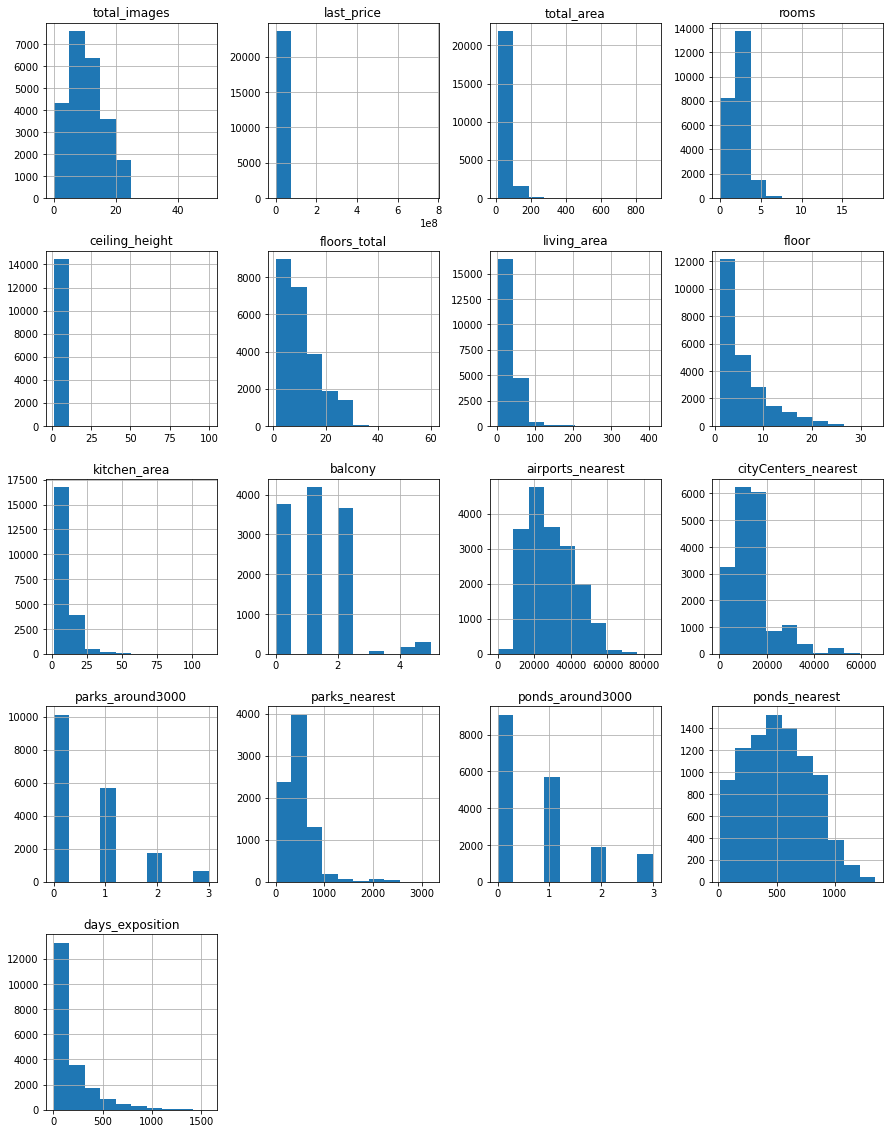

In [3]:
data.hist(figsize=(15, 20)); # построим общую гистограмму для всех числовых столбцов таблицы

**Выводы:**
* 1) данные в столбцах:

*  `'last_price'`, `'balcony'`, `'days_exposition'`, `'floors_total'`, `'parks_around3000'`, `' ponds_around3000'`, должны имень формат `'int'`, 

* `'is_apartment'` - `'bool'`,

* `'first_day_exposition'` - `datetime`
* 2) выводы по графикам
* в среднем больше, чем 7500 объявлений содержат около 10 фотографий
* на момент снятия объявления с публикации цена была почти у всех объявлений меньше 10000000
* общая площадь квартиры больше чем у 13000 квартир меньше 100 кв.м
* число комнат у 14000 квартир 2-3
* больше чем 14000 квартир имеют высоту потолков от 2 до 3
* больше чем в 9000 объявлении квартиры продаются в домах меньше 5 этажей
* больше чем в 17500 объявлениях жилая площадь квартир от 25 до 50
* более 12000 квартир продаются на этажах меньше 5
* больше чем в 9000 объявлениях площадь кухни меньше 7
* больше чем 4000 квартир имеют 1 балкон
* около 5000 квартир удалены от аэропорта в среднем на 25000 м
* около 12000 квартир удалены от центра города на расстояние более 6000 м
* более 10000 квартир не имеют водоемов в радиусе 3 км
* около 4000 квартир удалены от парка на расстояние менее 1000 м
* более 9000 квартир не имеют водоемов в радиусе 3 км
* около 1600 квартир удалены от водоема на расстояние 500 м
* более 4000 объявлении были на размещении менее, чем 100 дней

### Предобработка данных

**2.1. Находим и изучаем пропущенные значения в столбцах** 

In [4]:
display(data.isna().sum()) # находим сумму значений NaN по каждому столбцу

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Выводы:**

* высоту потолков `['ceiling_height']` не указали в 9195 объявлениях (можно заполнить по медианному значению)

* количество этажей в доме `['floors_total']` не указали 86 квартир (можно удалить, т.к. небольшое число содержит пропуски)

* жилую площадь `['living_area']` квартиры не указали в 1903 квартирах (можно заполнить средним значением)

* тип апартаменты `['is_apartment']` не указали в 20924 случаях (апартаменты появились не так давно, заменяем на False)

* площадь кухни `['kitchen_area']` не указали в 2278 случаев (можно заполнить средним значением)

* число балконов `['balcony']` не указали в 11519 случаях (скорее всего, балкона нет, и можно поставить 0)

* название населенного пункта `['locality_name']` не указали в 49 случаях (можно удалить, т.к. небольшое число содержит пропуски)

* расстояние до ближайшего аэропорта `['airports_nearest']` - 5542 пропуска (оставляем пропуски)

* расстояние до центра города `['cityCenters_nearest']` - 5519 пропусков (оставляем пропуски)

* количество парков в радиусе 3 километров `['parks_around3000']` - 5518 пропусков (скорее всего пропуски означают, что парков нет, заменим на 0)

* расстояние до ближайшего парка `['parks_nearest']` - 15620 пропусков (оставляем пропуски)

* количество водоемов в радиусе 3 километров `['ponds_around3000']` - 5518 пропусков (скорее всего пропуски означают, что водоемов нет, заменим на 0)

* расстояние до ближайшего водоема `['parks_nearest']` - 14589 (оставляем пропуски)
* количество дней размещенияя объявления `['days_exposition']` - 3181 (скорее всего пропуски означают, что объявление сразу было снято с публикации, заменим на ноль)

In [5]:
#данные, где не указан этаж можно удалить, т.к. их немного
data.dropna(subset=['floors_total'], inplace=True)
#в столбце апартаменты все пропущенные значения заменим на False 
#возможно, апартаменты появились относительно недавно, поэтому так много пропусков
data['is_apartment'] = data['is_apartment'].fillna(False)
#заменим пропуски в balcony на 0 
data['balcony'] = data['balcony'].fillna(0)
#данные, где не указана локация можно удалить, т.к. их немного
data.dropna(subset=['locality_name'], inplace=True)
#заменим пропуски в parks_around3000
data['parks_around3000'] = data['parks_around3000'].fillna(0)
#заменим пропуски в ponds_around3000
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#заменим пропуски в days_exposition
data['days_exposition'] = data['days_exposition'].fillna(0)
# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
    data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
print(data.isna().sum()) # находим сумму значений NaN по каждому столбцу

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64


**2.2. Изучаем и преобразуем типы данных в столбцах**

In [6]:
# в balcony заменим тип данных
data['balcony'] = data['balcony'].astype(int)
# в days_exposition заменим тип данных
data['days_exposition'] = data['days_exposition'].astype(int)
# gриводим этажность к целочисленному типу
data['floors_total'] = data['floors_total'].astype(int)
# в parks_around3000 заменим тип данных
data['parks_around3000'] = data['parks_around3000'].astype(int)
# в ponds_around3000 заменим тип данных
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
#столбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
#апартаменты появились относительно недавно
data['is_apartment'] = data['is_apartment'].fillna(False)
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
# в last_price заменим тип данных для удобства на int
data['last_price'] = data['last_price'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**2.3. Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты**

In [7]:
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок") # заменим "посёлок" на "поселок"
display(data['locality_name'].unique()) # выведем уникальные названия населенных пунктов

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

**2.4. Находим и устраняем редкие и выбивающиеся значения**

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.737873,10.675875,34.592277,5.878124,10.499898,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,1.009172,6.594823,22.373679,4.871485,6.037750,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


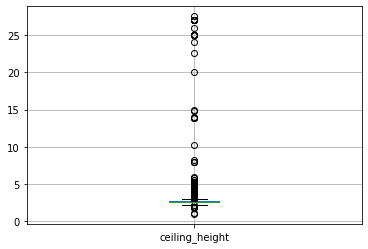

In [8]:
# Получим информацию о среднем и медианном значении данных
display(data.describe())
# Редкие и выбивающиеся значения можно найти с помощью boxplot(),
data.query('ceiling_height < 30').boxplot(['ceiling_height']);

In [9]:
# Рассчитаем процент значений, которые можно поправить в случае высоты потолка от 25 м до 32 м 
# (если теория верна, и высота потолков в 10 раз увеличена)
print(((data.query('ceiling_height > 25 and ceiling_height < 40')['ceiling_height'].count())*100/23565).round(decimals=2))

0.05


* Данные значения равны 12 и составляют менее 0,05%, исправлять не будем

(0.0, 12000000.0)

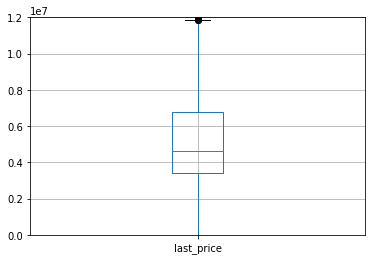

In [10]:
data.boxplot(['last_price'])
plt.ylim(0, 12000000)

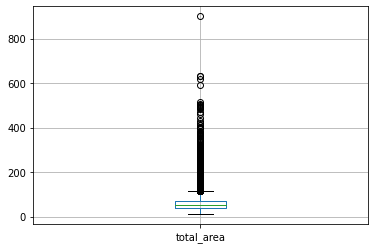

In [11]:
data.boxplot(['total_area']);

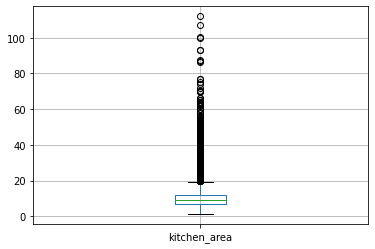

In [12]:
data.boxplot(['kitchen_area']);

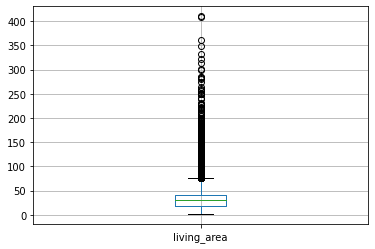

In [13]:
data.boxplot(['living_area']);

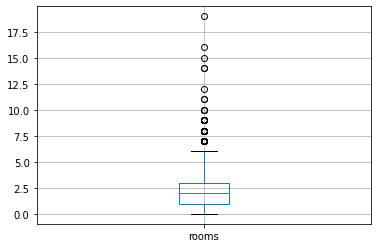

In [14]:
data.boxplot(['rooms']);

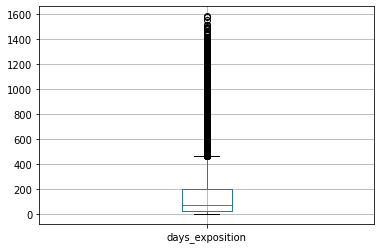

In [15]:
data.boxplot(['days_exposition']);

**Выбросы есть в столбцах ['ceiling_height'], ['last_price'], ['total_area'], ['kitchen_area'], ['living_area'], ['rooms'], ['days_exposition']. «Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Отбросим значения на основе 1,5 размаха, для улучшения адекватности данных (см. пункт 3 шага 4)** 

<div class="alert alert-info"> <b>Комментарии студента:</b> Сделала проверку на явные дубликаты и написала вывод.</div>

In [16]:
# проверим данные на явные дубликаты
print(data.duplicated().sum())

0


**Вывод:**
* 1) в данном разделе устранены пропуски в столбцах, кроме airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest (т.к пропусков достаточно большое количество, при этом причина возникновения не ясна)
* 2) данные в столбцах: `'last_price'`, `'balcony'`, `'days_exposition'`, `'floors_total'`, `'parks_around3000'`, `' ponds_around3000'`, привели к формату `'int'`, `'is_apartment'` - `'bool'`, `'first_day_exposition'` - `datetime`
* 3) Проверка на явные дубликаты показала, что их нет.
* 4) В наименованиях населенных пунктов заменили "посёлок" на "поселок"
* 5) Выбросы есть в столбцах `['ceiling_height']`, `['last_price']`, `['total_area']`, `['kitchen_area']`, `['living_area']`, `['rooms']`, `['days_exposition']`. 

### Посчитайте и добавьте в таблицу новые столбцы

In [17]:
# добавим столбец со стоимостью одного квадратного метра
data['sqmetr_price'] = (data['last_price'] / data['total_area']).astype(int)
# добавим столбец дня недели
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
# добавим столбец месяца
data['month'] = data['first_day_exposition'].dt.month
# добавим столбец года
data['year'] = data['first_day_exposition'].dt.year
# добавляем столбец со значением категории этажа
def name_floor(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['name_floor_type'] = data.apply(name_floor, axis=1)
# добавляем столбец расстояния до центра города в км и округляем до целых значений
data['distance_city_center'] = (data['cityCenters_nearest'] / 1000).round(decimals=0)
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmetr_price,day_of_week,month,year,name_floor_type,distance_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,0,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,90.0,2,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.60,14,90.816648,9,False,...,84.0,3,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121,100000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

**4.1. Изучаем параметры объектов**

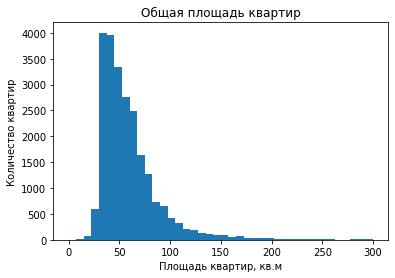

Квартиры с наибольшей площадью:


19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
Name: total_area, dtype: float64

Квартиры с наименьшей площадью:


19904    12.0
17961    13.0
19546    13.0
19807    13.0
19558    13.2
Name: total_area, dtype: float64

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


In [18]:
import matplotlib.pyplot as plt # подключаем библиотеку matplotlib.pyplot
# изучаем данные в столбце "общая площадь"
plt.hist(data['total_area'], bins=40, range=(0,300))
plt.title('Общая площадь квартир')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь квартир, кв.м')
plt.show()
print('Квартиры с наибольшей площадью:')
display(data['total_area'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшей площадью:')
display(data['total_area'].sort_values(ascending=True).head(5))
print(data['total_area'].describe())

**Вывод:**
* 1) Большинство квартир имеют площадь менее 100 кв.м, при этом среднее значение достигает 60 кв.м., медианное 52. Максимальная площадь, встречающихся в объявлениях квартир достигает 900 кв.м, минимальная 12 кв.м

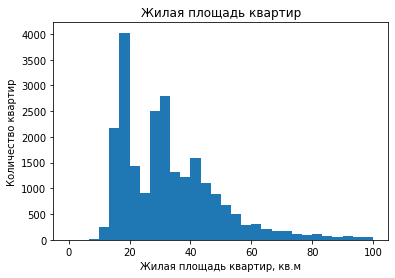

Квартиры с наибольшей жилой площадью:


19540    409.700000
5358     409.000000
3117     360.410721
12401    347.500000
4237     332.000000
Name: living_area, dtype: float64

Квартиры с наименьшей жилой площадью:


13915    2.0
21758    2.0
23574    3.0
3242     3.0
17582    5.0
Name: living_area, dtype: float64

count    23565.000000
mean        34.592277
std         22.373679
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


In [19]:
# изучаем данные в столбце "жилая площадь"
plt.hist(data['living_area'], bins=30, range=(0,100))
plt.title('Жилая площадь квартир')
plt.ylabel('Количество квартир')
plt.xlabel('Жилая площадь квартир, кв.м')
plt.show()
print('Квартиры с наибольшей жилой площадью:')
display(data['living_area'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшей жилой площадью:')
display(data['living_area'].sort_values(ascending=True).head(5))
print(data['living_area'].describe())

**Вывод:**
* 2) Максимальная жилая площадь равна 409 кв.м (встречается у 1-2 квартир из 23 тыс. объявл), минимальная - 12 кв.м , среднее значение 34,6 кв.м, медианное 22 кв.м, самы распространенные площади до 50 кв.м

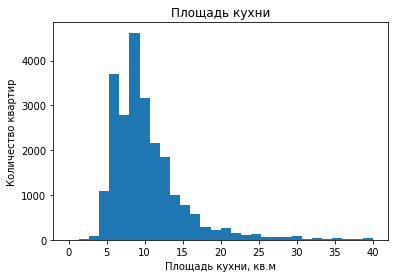

Квартиры с наибольшей площадью кухни:


19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64

Квартиры с наименьшей площадью кухни:


20217    1.3
9138     2.0
16367    2.0
21419    2.0
11033    2.0
Name: kitchen_area, dtype: float64

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [20]:
# изучаем данные в столбце "площадь кухни"
plt.hist(data['kitchen_area'], bins=30, range=(0,40))
plt.title('Площадь кухни')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь кухни, кв.м')
plt.show()
print('Квартиры с наибольшей площадью кухни:')
display(data['kitchen_area'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшей площадью кухни:')
display(data['kitchen_area'].sort_values(ascending=True).head(5))
print(data['kitchen_area'].describe())

**Вывод:**
* 3) Максимальная площадь кухни равна 112 кв.м (встречается у 1-2 квартир из 23 тыс. объявл), минимальная - 1,3 кв.м (встречается у 1-2 квартир из 23 тыс. объявл), среднее значение 10,5 кв.м, медианное 6 кв.м

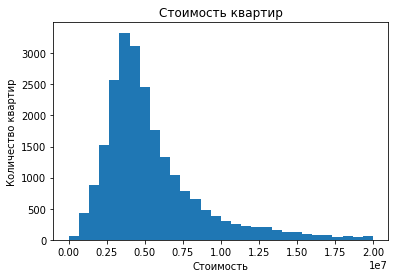

Квартиры с наибольшей стоимостью:


12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
Name: last_price, dtype: int64

Квартиры с наименьшей стоимостью:


8793      12190
17456    430000
14911    430000
16274    440000
9581     450000
Name: last_price, dtype: int64

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [21]:
# изучаем данные в столбце "цена объекта"
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.ylabel('Количество квартир')
plt.xlabel('Стоимость')
plt.show()
print('Квартиры с наибольшей стоимостью:')
display(data['last_price'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшей стоимостью:')
display(data['last_price'].sort_values(ascending=True).head(5))
print(data['last_price'].describe())

**Вывод:**
* 4) Стоимость большинства квартир не превышает 5 млн

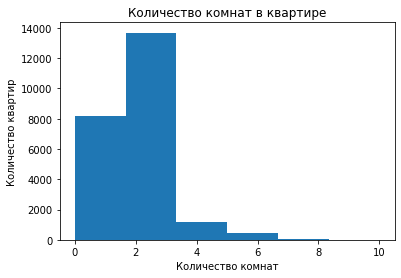

Квартиры с наибольшим количеством комнат:


14498    19
18848    16
5358     15
20829    14
866      14
Name: rooms, dtype: int64

Квартиры с наименьшим количеством комнат:


1625     0
6225     0
19154    0
23554    0
20584    0
Name: rooms, dtype: int64

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [22]:
# изучаем данные в столбце "количество комнат"
plt.hist(data['rooms'], bins=6, range=(0,10))
plt.title('Количество комнат в квартире')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()
print('Квартиры с наибольшим количеством комнат:')
display(data['rooms'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшим количеством комнат:')
display(data['rooms'].sort_values(ascending=True).head(5))
print(data['rooms'].describe())

**Вывод:**
* 5) Большинство квартир содержат 2-3 комнаты, количество 1 комнатных квартир чуть меньше, есть небольшая доля 4 комнатных квартир. 

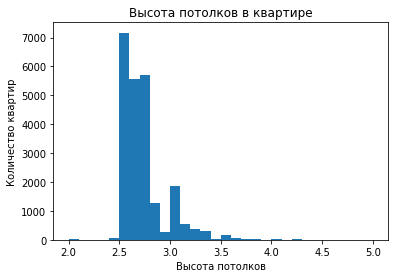

Квартиры с наибольшей высотой потолков:


22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
Name: ceiling_height, dtype: float64

Квартиры с наименьшей высотой потолков:


22590    1.00
5712     1.20
16934    1.75
16884    2.00
19329    2.00
Name: ceiling_height, dtype: float64

count    23565.000000
mean         2.737873
std          1.009172
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64


In [23]:
# изучаем данные в столбце "высота потолков"
plt.hist(data['ceiling_height'], bins=30, range=(2,5))
plt.title('Высота потолков в квартире')
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолков')
plt.show()
print('Квартиры с наибольшей высотой потолков:')
display(data['ceiling_height'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшей высотой потолков:')
display(data['ceiling_height'].sort_values(ascending=True).head(5))
print(data['ceiling_height'].describe())

**Вывод:**
* 6) Большинство квартир имеют высоту потолков от 2,5 до 2,8 м. Есть значения в 27 метров, возможно реальная высота равна 2,7 метра.

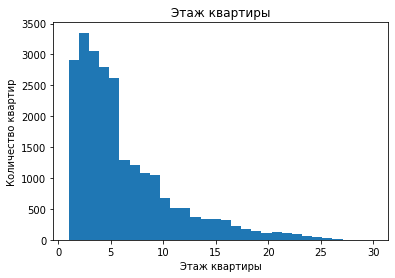

Квартиры с наибольшим номером этажа:


18218    33
11575    32
18629    31
1917     30
11079    29
Name: floor, dtype: int64

Квартиры с наименьшим номером этажа:


23698    1
3127     1
13585    1
13579    1
13576    1
Name: floor, dtype: int64

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [24]:
# изучаем данные в столбце "этаж квартиры"
plt.hist(data['floor'], bins=30, range=(1,30))
plt.title('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.xlabel('Этаж квартиры')
plt.show()
print('Квартиры с наибольшим номером этажа:')
display(data['floor'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшим номером этажа:')
display(data['floor'].sort_values(ascending=True).head(5))
print(data['floor'].describe())

**Вывод:**
* 7) Квартиры на 1-5 этажах продаются чаще всего

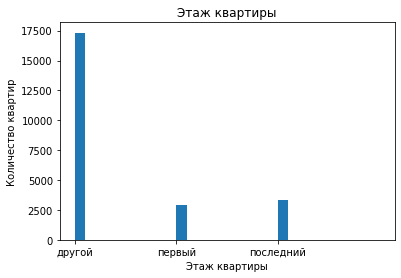

count      23565
unique         3
top       другой
freq       17326
Name: name_floor_type, dtype: object


In [25]:
# изучаем данные в столбце "категория этажа"
plt.hist(data['name_floor_type'], bins=30, range=(0,3))
plt.title('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.xlabel('Этаж квартиры')
plt.show()
print(data['name_floor_type'].describe())

**Вывод:**
* 8) Первый и последний этажи встречаются примерно с одинаковой частотой, остальные этажи в 6 раз чаще, каждого из них 

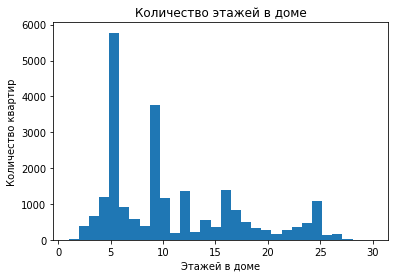

Квартиры с наибольшим количеством этажей в доме:


2253     60
16731    52
16934    37
5807     36
11079    36
Name: floors_total, dtype: int64

Квартиры с наименьшим количеством этажей в доме:


19590    1
9752     1
9517     1
17744    1
3076     1
Name: floors_total, dtype: int64

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [26]:
# изучаем данные в столбце "этажей в доме"
plt.hist(data['floors_total'], bins=30, range=(1,30))
plt.title('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.xlabel('Этажей в доме')
plt.show()
print('Квартиры с наибольшим количеством этажей в доме:')
display(data['floors_total'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшим количеством этажей в доме:')
display(data['floors_total'].sort_values(ascending=True).head(5))
print(data['floors_total'].describe())

**Вывод:**
* 9) Большего всего продается квартир в 5 этажных домах

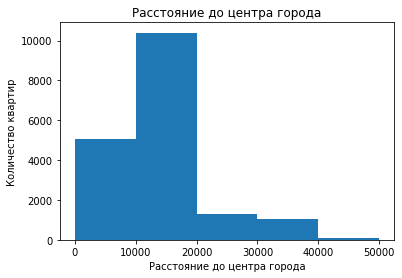

Квартиры с наибольшим расстоянием до центра города:


9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
Name: cityCenters_nearest, dtype: float64

Квартиры с наименьшим расстоянием до центра города:


13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
Name: cityCenters_nearest, dtype: float64

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [27]:
# изучаем данные в столбце "расстояние до центра города"
plt.hist(data['cityCenters_nearest'], bins=5, range=(0,50000))
plt.title('Расстояние до центра города')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до центра города')
plt.show()
print('Квартиры с наибольшим расстоянием до центра города:')
display(data['cityCenters_nearest'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшим расстоянием до центра города:')
display(data['cityCenters_nearest'].sort_values(ascending=True).head(5))
print(data['cityCenters_nearest'].describe())

**Вывод:**
* 10) Больше чем в 10000 объявлений расстояние до центра города составляет от 10 до 20 км

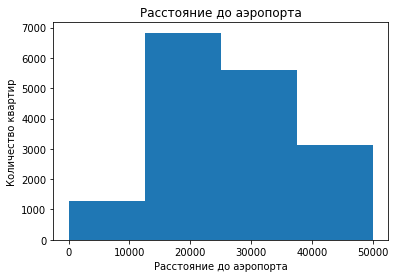

Квартиры с наибольшим расстоянием до аэропорта:


9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
Name: airports_nearest, dtype: float64

Квартиры с наименьшим расстоянием до аэропорта:


21085       0.0
12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [28]:
# изучаем данные в столбце "расстояние до аэропорта"
plt.hist(data['airports_nearest'], bins=4, range=(0,50000))
plt.title('Расстояние до аэропорта')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до аэропорта')
plt.show()
print('Квартиры с наибольшим расстоянием до аэропорта:')
display(data['airports_nearest'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшим расстоянием до аэропорта:')
display(data['airports_nearest'].sort_values(ascending=True).head(5))
print(data['airports_nearest'].describe())

**Вывод:**
* 11) У 50% квартир расстояние до аэропорта составляет в среденем 27 км

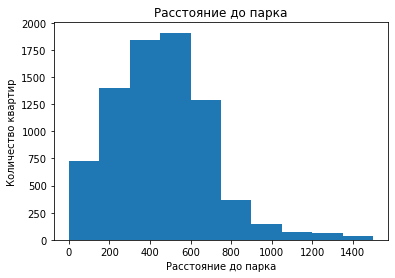

Квартиры с наибольшим расстоянием до парка:


10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
Name: parks_nearest, dtype: float64

Квартиры с наименьшим расстоянием до парка:


14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
Name: parks_nearest, dtype: float64

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [29]:
# изучаем данные в столбце "расстояние до парка"
plt.hist(data['parks_nearest'], bins=10, range=(0,1500))
plt.title('Расстояние до парка')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до парка')
plt.show()
print('Квартиры с наибольшим расстоянием до парка:')
display(data['parks_nearest'].sort_values(ascending=False).head(5))
print('Квартиры с наименьшим расстоянием до парка:')
display(data['parks_nearest'].sort_values(ascending=True).head(5))
print(data['parks_nearest'].describe())

**Вывод:**
* 12) Расстояние до парка у большинства квартир составляет от 200 до 700 м

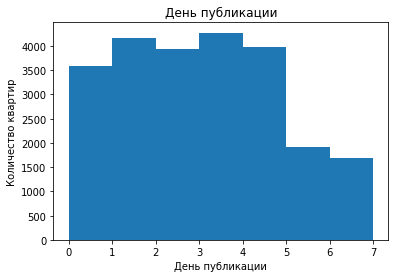

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64


In [30]:
# изучаем данные в столбце "день публикации"
plt.hist(data['day_of_week'], bins=7, range=(0,7))
plt.title('День публикации')
plt.ylabel('Количество квартир')
plt.xlabel('День публикации')
plt.show()
print(data['day_of_week'].describe())

**Вывод:**
* 13) Большинство объявлений о продаже квартир публикуется в будни

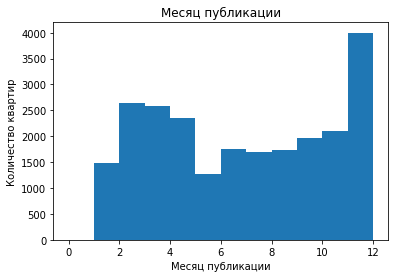

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


In [31]:
# изучаем данные в столбце "месяц публикации"
plt.hist(data['month'], bins=12, range=(0,12))
plt.title('Месяц публикации')
plt.ylabel('Количество квартир')
plt.xlabel('Месяц публикации')
plt.show()
print(data['month'].describe())

**Вывод:**
* 14) Много объявлений о продаже было размещено в декабре, меньше всего размещалось в январе и мае

**Вывод:**
* 1) Большинство квартир имеют площадь менее 100 кв.м, при этом среднее значение достигает 60 кв.м. Максимальная площадь, встречающихся в объявлениях квартир достигает 900 кв.м, минимальная 12 кв.м
* 2) Максимальная жилая площадь равна 409 кв.м (встречается у 1-2 квартир из 23 тыс. объявл), минимальная - 12 кв.м , среднее значение 34,6 кв.м, медианное 22 кв.м, самы распространенные площади до 50 кв.м
* 3) Максимальная площадь кухни равна 112 кв.м (встречается у 1-2 квартир из 23 тыс. объявл), минимальная - 1,3 кв.м (встречается у 1-2 квартир из 23 тыс. объявл), среднее значение 10,5 кв.м, медианное 6 кв.м
* 4) Стоимость большинства квартир не превышает 6,5 млн
* 5) Большинство квартир содержат 2-3 комнаты, количество 1 комнатных квартир чуть меньше, есть небольшая доля 4 комнатных квартир. 
* 6) Большинство квартир имеют высоту потолков от 2,5 до 2,8 м. Есть значения в 27 метров, возможно реальная высота равна 2,7 метра.
* 7) Квартиры на 1-5 этажах продаются чаще всего
* 8) Первый и последний этажи встречаются примерно с одинаковой частотой, остальные этажи в 6 раз чаще, каждого из них 
* 9) Большего всего продается квартир в 5 этажных домах
* 10) Больше чем в 10000 объявлений расстояние до центра города составляет от 10 до 20 км
* 11) У 50% квартир расстояние до аэропорта составляет в среденем 27 км
* 12) Расстояние до парка у большинства квартир составляет от 200 до 700 м
* 13) Большинство объявлений о продаже квартир публикуется в будни
* 14) Много объявлений о продаже было размещено в декабре, меньше всего размещалось в январе и мае

**4.2. Изучаем, как быстро продавались квартиры**

Медиана продолжительности времени (по дням) размещения объявления от публикации до снятия: 95
Средняя продолжительность времени (по дням) размещения объявления от публикации до снятия: 181


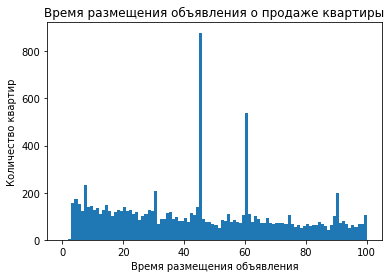

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [32]:
# отбросим нулевые значения и рассчитаем медиану по столбцу days_exposition
print('Медиана продолжительности времени (по дням) размещения объявления от публикации до снятия:',
      round(data.query('days_exposition !=0')['days_exposition'].median()))
# отбросим нулевые значения и рассчитаем среднее по столбцу days_exposition
print('Средняя продолжительность времени (по дням) размещения объявления от публикации до снятия:',
      round(data.query('days_exposition !=0')['days_exposition'].mean()))
# построим гистограмму времени размещения объявлении о продаже квартир
plt.hist(data.query('days_exposition !=0')['days_exposition'], bins=100, range=(0,100))
plt.title('Время размещения объявления о продаже квартиры')
plt.ylabel('Количество квартир')
plt.xlabel('Время размещения объявления')
plt.show()
print(data.query('days_exposition !=0')['days_exposition'].describe())

**Вывод:**
* Медиана продолжительности продажи квартиры составила 95 дней, а средняя продолжительность составила 181. Большая часть квартир продается за срок до 100 дней. Есть квартиры, которые были проданы в срок до 10 дней, максимальное время продажи квартиры составило 1580 дней. Быстрой продажей можно назвать срок до 45 дней, долгой больше 230.

In [33]:
# отфильтруем редкие и выбивающиеся значения на основе 1,5 размаха.
# запишем функцию для посчета границ
def quar (table, column):
    q1 = table[column].quantile(0.25)
    q3 = table[column].quantile(0.75)
    iqr = q3 - q1
    tableq = table.loc[(table[column] < q3 + 1.5*iqr) & (table[column] > q1 - 1.5*iqr), column]
    return tableq
list_column = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for i in list_column:
    data[i] = quar(data, i)
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmetr_price,day_of_week,month,year,distance_city_center
count,23565.000000,2.151900e+04,22326.000000,23371.000000,21837.000000,23565.000000,22682.000000,23565.000000,22250.000000,23565.000000,...,23565.000000,8030.000000,23565.000000,9036.000000,21539.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,18064.000000
mean,9.878421,4.837115e+06,54.319704,2.030208,2.659333,10.675875,31.526984,5.878124,9.417840,0.593677,...,0.468831,490.580448,0.589900,518.289509,103.573889,9.940539e+04,2.567367,6.401570,2017.371016,14.186504
std,5.681156,2.215774e+06,19.331030,0.973563,0.143003,6.594823,13.752739,4.871485,3.177523,0.960660,...,0.748403,341.572956,0.883966,278.009558,111.664697,5.038944e+04,1.788279,3.492948,1.037393,8.621131
min,0.000000,1.219000e+04,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,0.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,18.000000,7.656600e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,0.000000,503.000000,60.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.750000,16.000000,40.600000,8.000000,11.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,153.000000,1.142130e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,1.186686e+07,114.200000,5.000000,3.050000,60.000000,76.700000,33.000000,19.450000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,461.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


**4.3. Изучаем, какие факторы больше всего влияют на общую стоимость объекта**

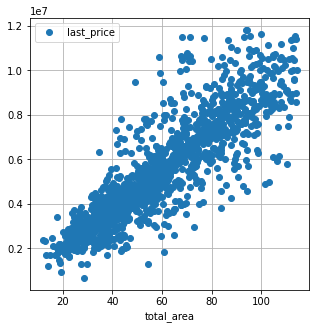

Корреляция цены и общей площади:


,last_price,total_area
last_price,1.000000,0.905372
total_area,0.905372,1.000000


In [34]:
# Исследуем зависимость цены от общей площади, применив перед визуализацией сводные таблицы
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и общей площади:')
display(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

**Выводы:** 
* 1) корреляция **общей площади и цены** высокая и составляет 0.905 (чем больше площадь, тем больше цена)

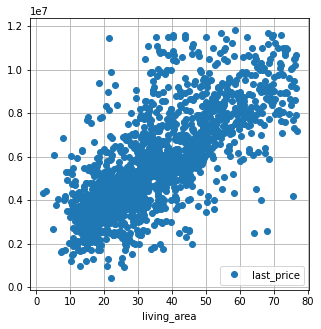

Корреляция цены и жилой площади:


,last_price,living_area
last_price,1.000000,0.729359
living_area,0.729359,1.000000


In [35]:
# Исследуем зависимость цены от жилой площади, применив перед визуализацией сводные таблицы
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и жилой площади:')
display(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())

**Выводы:** 
* 2) корреляция **жилой площади и цены** чуть меньше и составляет 0.73 

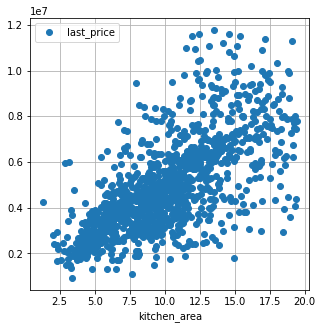

Корреляция цены и площади кухни:


,kitchen_area,last_price
kitchen_area,1.000000,0.445313
last_price,0.445313,1.000000


In [36]:
# Исследуем зависимость цены от площади кухни, применив перед визуализацией сводные таблицы
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади кухни:')
display(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

**Выводы:** 
* 3) корреляция **площади кухни и цены** составляет 0.45 (не всегда, чем больше площадь кухни, тем выше цена)

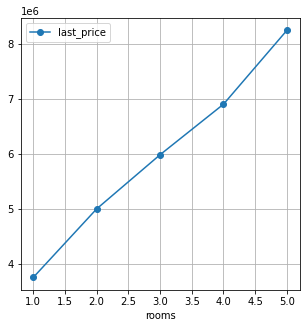

Корреляция цены и количества комнат:


,last_price,rooms
last_price,1.000000,0.537551
rooms,0.537551,1.000000


In [37]:
# Исследуем зависимость цены от количества комнат, применив перед визуализацией сводные таблицы
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и количества комнат:')
display(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr())

**Выводы:** 
* 4) корреляция **количества комнат и цены** равна 0.54 (бывает, что комнат много, но они очень маленькие по метражу)

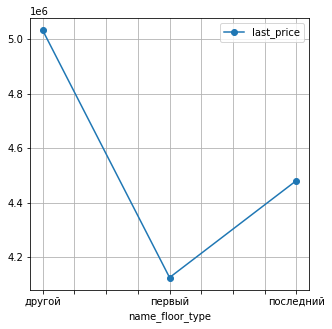

In [38]:
# Исследуем зависимость цены от этажа, применив перед визуализацией сводные таблицы
data.pivot_table(index='name_floor_type', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

**Выводы:** 
* 5) **стоимость квартир на** последнем **этаже** выше, чем на первом, но значительно ниже, чем на лбом другом

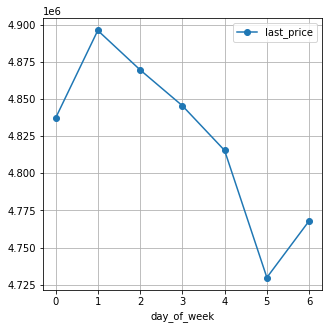

Корреляция цены и дня недели:


,day_of_week,last_price
day_of_week,1.000000,0.668132
last_price,0.668132,1.000000


In [39]:
# Исследуем зависимость цены от дня недели, применив перед визуализацией сводные таблицы
data.pivot_table(index='day_of_week', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и дня недели:')
display(data.pivot_table(index='floor', values=['day_of_week', 'last_price']).corr())

**Выводы:** 
* 6) корреляция **цены и дня недели** достаточно большая и составляет 0.67 (цена уменьшается к концу рабочей недели)

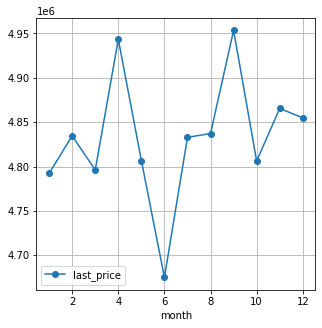

Корреляция цены и месяца:


,last_price,month
last_price,1.000000,0.031709
month,0.031709,1.000000


In [40]:
# Исследуем зависимость цены от месяца, применив перед визуализацией сводные таблицы
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и месяца:')
display(data.pivot_table(index='floor', values=['month', 'last_price']).corr())

**Выводы:** 
* 7) корреляция **цены и месяца** очень мала, согласно графику дешевле всех квартиры с июня, а дороже с апреля и сентября

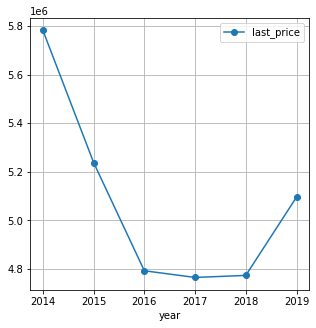

Корреляция цены и года:


,last_price,year
last_price,1.000000,0.073543
year,0.073543,1.000000


In [41]:
# Исследуем зависимость цены от года, применив перед визуализацией сводные таблицы
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и года:')
display(data.pivot_table(index='floor', values=['year', 'last_price']).corr())

**Выводы:** 
* 8) в 2016-2018 годах цена на квартиры упала, в 2014 была самой высокой, с 2018 стала снова подниматься (корреляция цены и года низкая)

**Выводы:** 
* 1) корреляция **общей площади и цены** высокая и составляет 0.905 (чем больше площадь, тем больше цена)
* 2) корреляция **жилой площади и цены** чуть меньше и составляет 0.73 
* 3) корреляция **площади кухни и цены** составляет 0.45 (не всегда, чем больше площадь кухни, тем выше цена)
* 4) корреляция **количества комнат и цены** равна 0.54 (бывает, что комнат много, но они очень маленькие по метражу)
* 5) **стоимость квартир на** последнем **этаже** выше, чем на первом, но значительно ниже, чем на лбом другом
* 6) корреляция **цены и дня недели** достаточно большая и составляет 0.67 (цена уменьшается к концу рабочей недели)
* 7) корреляция **цены и месяца** очень мала, согласно графику дешевле всех квартиры с июня, а дороже с апреля и сентября
* 8) в 2016-2018 годах цена на квартиры упала, в 2014 была самой высокой, с 2018 стала снова подниматься (корреляция цены и года низкая)

**4.4. Рассчитываем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений**

In [42]:
# рассчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений
ten_city = data['locality_name'].value_counts().head(10)
ten_city_sqmetr_price = data.query('locality_name in @ten_city.index').pivot_table(index ='locality_name', values ='sqmetr_price', aggfunc='median').round(decimals=0)
display(ten_city_sqmetr_price.sort_values('sqmetr_price', ascending = False))

,sqmetr_price
locality_name,
Санкт-Петербург,104774.0
Пушкин,100000.0
деревня Кудрово,91860.0
поселок Парголово,91642.0
поселок Мурино,86058.0
поселок Шушары,76829.0
Колпино,74724.0
Гатчина,67796.0
Всеволожск,65789.0


**Вывод:**
* Наибольшая стоимость квадратного метра в Санкт-Петербурге, наименьшая в Выборге, как наиболее удаленном от Санкт-Петербурга городе

**4.5. Изучаем, как стоимость объектов зависит от расстояния до центра города**

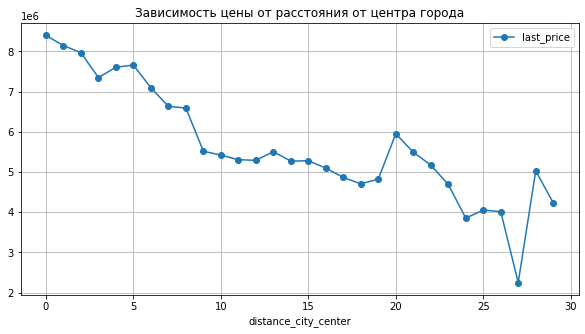

In [43]:
# Вычислим среднюю цену каждого км в Санкт-Петербурге и построим график
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'distance_city_center', values = 'last_price')
    .plot(grid=True, style='o-', figsize=(10,5), title = 'Зависимость цены от расстояния от центра города')
)
plt.show()


**Вывод:** 
* цена начинает снижаться на расстоянии 5 км от центра

### Общий вывод

**В ПРОЦЕССЕ РАБОТЫ НАД ПРОЕКТОМ БЫЛИ РЕШЕНЫ СЛЕДУЮЩИЕ ЗАДАЧИ:**
* 1) Изучены параметры объектов недвижимости
* 2) Изучена скорость продажи квартир по длительности опубликования объявлений на сайте
* 3) Изучено влияние факторов (площадь, этаж, количество комнат и т.д.) на цену объектов недвижимости
* 4) Рассмотрено распределение объектов недвижимости, входящих в топ 10 по количеству объявлений, от цены за кв. м
* 5) Изучено как меняется цена 1 кв.м по отношению к расстоянию от центра города

**БЫЛИ СДЕЛАНЫ СЛЕДУЮЩИЕ ВЫВОДЫ:**

**- ПРОДОЛЖИТЕЛЬНОСТЬ РАЗМЕЩЕНИЯ ОБЪЯВЛЕНИЯ ОТ ПУБЛИКАЦИИ ДО СНЯТИЯ**
* Медиана продолжительности продажи квартиры составила 95 дней, а средняя продолжительность составила 181. Большая часть квартир продается за срок до 100 дней. Есть квартиры, которые были проданы в срок до 10 дней, максимальное время продажи квартиры составило 1580 дней. Быстрой продажей можно назвать срок до 45 дней, долгой больше 230.

**- ВЛИЯНИЕ ФАКТОРОВ НА ОБЩУЮ СТОИМОСТЬ** 
* 1) Наибольшая корреляция **общей площади и цены**, составляет 0.905 (чем больше площадь, тем больше цена)
* 2) корреляция **жилой площади и цены** чуть меньше и составляет 0.73 
* 3) корреляция **цены и дня недели** достаточно большая и составляет 0.67 (цена уменьшается к концу рабочей недели)
* 4) корреляция **площади кухни и цены** и **количества комнат и цены** сопоставимы и равны в среднем 0.5
* 5) **стоимость квартир на** последнем **этаже** выше, чем на первом, но значительно ниже, чем на лбом другом
* 6) корреляция **цены и месяца** и **цены и года* равны в пределах 0,07

**- СРЕДНЯЯ ЦЕНА КВАДРАТНОГО МЕТРА В ТОП_10 НАСЕЛЕННЫХ ПУНКТАХ ПО КОЛИЧЕСТВУ ОБЪЯВЛЕНИЙ**
* Наибольшая стоимость квадратного метра в Санкт-Петербурге, наименьшая в Выборге, как наиболее удаленном от Санкт-Петербурга городе

**- СТОИМОСТЬ ОБЪЕКТОВ В ЗАВИСИМОСТИ ОТ РАССТОЯНИЯ ОТ ЦЕНТРА ГОРОДА** 
* Цена начинает снижаться на расстоянии 5 км от центра города
